## Lecture 3

### Numpy

## Covered topics:

* `numpy` - a package for storing and working with N-dimensional arrays of data.
* Why Python's `list` object is not adequate.
  * Dealing with high-dimensional data tricky.
  * Does not have 'maths' notation, e.g. $x + y$
  * Speed.
* Slicing.
* Examples:
  * Mandelbrot set.
  * Markov chains.
  * Calculating $\pi$ via random sampling.

Working with numbers is at the core of most activities in scientific and engineering computations. The topic is so important that there entire libraries dedicated to working with numbers. `numpy` is the most important and widely used package for dealing with numerical data in Python.

We have already seen Python's `list` data structure. We used it for storing a list (sometimes called an array) of data of arbitrary type. We also know how to *slice* the list to get out particular elements we are interested in, and *iterate* over the list.

*Reminder:*

In [1]:
mylist = [0, 3, 4, 5, 'test']
print(mylist[0:3])
print(mylist[-1])
for l in mylist:
    print(l)

[0, 3, 4]
test
0
3
4
5
test


### 'Problems' with Python's `list`.

1. Dealing with high-dimension data is tricky.

\begin{equation}
A = \begin{bmatrix} 
0 & 1 & 2 \\
3 & 4 & 5 \\
6 & 7 & 8
\end{bmatrix}
\end{equation}

Idea: A list of lists! Let's put each row in its own `list` and then put the rows in another list.

In [2]:
A = [[0, 1, 2], [3, 4, 5], [6, 7, 8]]

*Exercises*: 
1. Select the first row.
2. Select the first number of the second row.
3. Print the first column. (Not so easy).

In [3]:
A = [[0, 1, 2], [3, 4, 5], [6, 7, 8]]

print(A[0])
print(A[1][0])
for row in A:
    print(row[0])

[0, 1, 2]
3
0
3
6


2. `list` does not conform to 'standard' mathematical conventions.

$$ x = [1, 2, 3]$$
$$ y = [4, 5, 6]$$
$$ x + y = \; ? $$

In [4]:
x = [1, 2, 3]
y = [4, 5, 6] 
x + y

[1, 2, 3, 4, 5, 6]

## Something better: `numpy`

In [5]:
import numpy
import numpy as np # np is now an alias (shorthand) for numpy
np.lookfor('create array')

Search results for 'create array'
---------------------------------
numpy.memmap
    Create a memory-map to an array stored in a *binary* file on disk.
numpy.diagflat
    Create a two-dimensional array with the flattened input as a diagonal.
numpy.fromiter
    Create a new 1-dimensional array from an iterable object.
numpy.partition
    Return a partitioned copy of an array.
numpy.ctypeslib.as_array
    Create a numpy array from a ctypes array or POINTER.
numpy.ma.diagflat
    Create a two-dimensional array with the flattened input as a diagonal.
numpy.ma.make_mask
    Create a boolean mask from an array.
numpy.lib.Arrayterator
    Buffered iterator for big arrays.
numpy.ctypeslib.as_ctypes
    Create and return a ctypes object from a numpy array.  Actually
numpy.ma.mrecords.fromarrays
    Creates a mrecarray from a (flat) list of masked arrays.
numpy.ma.mvoid.__new__
    Create a new masked array from scratch.
numpy.ma.MaskedArray.__new__
    Create a new masked array from scratch.
nu

In [6]:
x = np.array([1, 2, 3])
y = np.array([4, 5, 6])
# f-strings, Python 3.6 and above
print(f"x: {x}")
print(f"y: {y}")

x: [1 2 3]
y: [4 5 6]


In [7]:
x + y

array([5, 7, 9])

3. Speed

*Exercise*: Write a function `numpy_add` that takes two numpy arrays, loops over the entries, and computes the sum entry-by-entry and places the result into a third numpy array.

Tips:

* `def` - define a function
* `return x` - return `x` from the function
* `len(a)` - get the length of an array.
* `np.zeros(n)` - make a numpy array of length `n`
* `for i in range(0, len(a)): print(i)` - counting indices $0, ..., \mathrm{len}(a) - 1$ 

In [8]:
def numpy_add(a, b):
    assert(len(a) == len(b))
    c = np.zeros(len(a))
    for i in range(0, len(a)):
        c[i] = a[i] + b[i]
    return c
        
a = np.ones(1000000)
b = np.ones(1000000)

In [9]:
%time c = numpy_add(a, b)

CPU times: user 287 ms, sys: 77 µs, total: 287 ms
Wall time: 287 ms


In [10]:
%time c = a + b

CPU times: user 129 µs, sys: 4.7 ms, total: 4.83 ms
Wall time: 3.29 ms


## Key points:
* Avoid writing 'tight' loops in Python.
  * Tight loop - looping over thousands of entries of data and performing a single operation on each piece of data.
* Think about how algorithms can be written without tight loops.
* Always prefer functionality in numpy that can act on many pieces of data in one call.

*Example*: Plot the function $\sin(x)$.

In [11]:
x = np.linspace(0.0, 2.0*np.pi, num=50)
y = np.sin(x) # Apply sin function to all of the entries of x
print(f"x: {x}")
print(f"y: {y}")

x: [0.         0.12822827 0.25645654 0.38468481 0.51291309 0.64114136
 0.76936963 0.8975979  1.02582617 1.15405444 1.28228272 1.41051099
 1.53873926 1.66696753 1.7951958  1.92342407 2.05165235 2.17988062
 2.30810889 2.43633716 2.56456543 2.6927937  2.82102197 2.94925025
 3.07747852 3.20570679 3.33393506 3.46216333 3.5903916  3.71861988
 3.84684815 3.97507642 4.10330469 4.23153296 4.35976123 4.48798951
 4.61621778 4.74444605 4.87267432 5.00090259 5.12913086 5.25735913
 5.38558741 5.51381568 5.64204395 5.77027222 5.89850049 6.02672876
 6.15495704 6.28318531]
y: [ 0.00000000e+00  1.27877162e-01  2.53654584e-01  3.75267005e-01
  4.90717552e-01  5.98110530e-01  6.95682551e-01  7.81831482e-01
  8.55142763e-01  9.14412623e-01  9.58667853e-01  9.87181783e-01
  9.99486216e-01  9.95379113e-01  9.74927912e-01  9.38468422e-01
  8.86599306e-01  8.20172255e-01  7.40277997e-01  6.48228395e-01
  5.45534901e-01  4.33883739e-01  3.15108218e-01  1.91158629e-01
  6.40702200e-02 -6.40702200e-02 -1.91158629

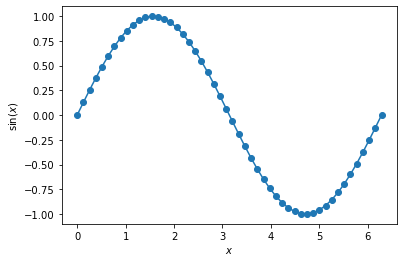

In [12]:
import matplotlib.pyplot as plt
plt.xlabel(r"$x$")
plt.ylabel(r"$\sin(x)$")
plt.plot(x, y, 'o-')

## Slicing

*Slicing* allows us to select one or more than one elements of an existing array.

In [13]:
a = np.arange(5)
print(a)

[0 1 2 3 4]


## Selecting single elements of an array

* Select the first element

In [14]:
a[0]

0

* Select the third element (remember, index starts from zero!)

In [15]:
a[2]

2

* Select the fifth element (remember, index starts from zero!)

In [16]:
a[4]

4

* Select the last element, without knowing the length of the array.

In [17]:
a[-1]

4

## Selecting multiple elements of an array 

* Select the first and second elements of the array.
* syntax: `[start:end]` exclusive of `end`
  * default start: `0`
  * default end: `N`

In [18]:
print(a[0:len(a)])
print(a[:])

[0 1 2 3 4]
[0 1 2 3 4]


* First to end

In [19]:
a[0:5]

array([0, 1, 2, 3, 4])

In [20]:
a[0:]

array([0, 1, 2, 3, 4])

* Exercise: Select the second, third and fourth elements

In [21]:
a[1:4]

array([1, 2, 3])

* Exercise: Select everything.

In [22]:
a[:]

array([0, 1, 2, 3, 4])

## Advanced slicing

* Select every second element.
* Syntax: `[start:end:stride]`
  * default start: `0` for `stride > 0` and `-1` for `stride < 0`
  * default end: `N` for `stride > 0` and `- N - 1` for `stride < 0` 
  * default stride: `1`
  
Full details: https://numpy.org/doc/stable/reference/arrays.indexing.html

In [23]:
a[::2]

array([0, 2, 4])

In [24]:
a[::2]

array([0, 2, 4])

Let's make a longer array.

In [25]:
b = np.arange(0, 10)
print(b)

[0 1 2 3 4 5 6 7 8 9]


* Exercise: Select every third entry starting with the second entry.

In [26]:
b[1::3]

array([1, 4, 7])

* *Exercise*: Starting with the last entry, select every third entry working backwards through the array. (Hint: Try playing with a `stride` of `-1`).

In [27]:
b[-1::-3]

array([9, 6, 3, 0])

* *Exercise*: Starting with the second to last entry, select every third entry working backwards through the array.

In [28]:
b[-2::-3]

array([8, 5, 2])

## N-dimensional indexing
* Slices in each axis are seperated by commas.
* `[start0:stop0:step0, start1:stop1:step1]`
  * Default: `[,]` = `[::,::]`

In [29]:
import numpy as np
c = np.arange(0, 32).reshape(8, -1)
print(c)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]
 [24 25 26 27]
 [28 29 30 31]]


* Select the element on the third row in the fourth column.

In [30]:
c[2, 3] # [axis0, axis1]

11

* *Exercise*: Starting from the first row, select every second row, and select every column.
  * Select every second row.

In [31]:
c[::2,]

array([[ 0,  1,  2,  3],
       [ 8,  9, 10, 11],
       [16, 17, 18, 19],
       [24, 25, 26, 27]])

In [32]:
c[::2, ]

array([[ 0,  1,  2,  3],
       [ 8,  9, 10, 11],
       [16, 17, 18, 19],
       [24, 25, 26, 27]])

In [33]:
c[::2]

array([[ 0,  1,  2,  3],
       [ 8,  9, 10, 11],
       [16, 17, 18, 19],
       [24, 25, 26, 27]])

* Exercise: Select the elements in every third row, starting with the second row, and in every second column.

In [34]:
c[1::3, ::2]

array([[ 4,  6],
       [16, 18],
       [28, 30]])

## Slicing based on integers
* Select the elements at (1, 1), (2, 2) and (3, 3).

In [35]:
c[(1, 2, 3), (1, 2, 3)]

array([ 5, 10, 15])

* Exercise: Select the elements at (5, 3) and (1, 2).

In [36]:
c[[5, 1], [3, 2]] # Can use lists, ndarrays or tuples.

array([23,  6])

## Slicing based on booleans

In [37]:
c < 5

array([[ True,  True,  True,  True],
       [ True, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False]])

In [38]:
c[c < 5]

array([0, 1, 2, 3, 4])

## Mini-project: Mandelbrot set

#### Key Skills:

* Complex numbers
* Creating a grid of points in the complex plane
* Iteration
* Avoiding tight loops with operations on `numpy` arrays
* Boolean masking
* Basic plot

The Mandelbrot set is the set of complex numbers $c$ that remain bounded under repeated application of the function:
$$z_0 = c \quad z_{n + 1} = z_{n}^2 + c$$

### A reminder of complex numbers

$$z = x + j y$$ 

where $j = \sqrt{-1}$ and $x = \Re(z)$ and $y = \Im(z)$ are the real and complex parts of $z$.

In [39]:
z = 3.0 + 1j*4.0
print("Real part of z: {}".format(np.real(z)))
print("Imaginary part of z: {}".format(np.imag(z)))
print("z + z = {}".format(z + z))
print("z**2 = {}".format(z**2))

Real part of z: 3.0
Imaginary part of z: 4.0
z + z = (6+8j)
z**2 = (-7+24j)


### Step 1: Create a grid of points $c$ in the complex plane

1. Tool: `np.linspace`. Create 300 points between -2 and 1 and place the result in `x`.
2. Tool: `np.linspace`. Create 300 points between -1.5 and 1.5 and place the result in `y`.
3. Tool: `x[:, np.newaxis]`, `y[np.newaxis, :]`. What does this do?

In [40]:
x = np.linspace(-2, 1, 300)
y = np.linspace(-1.5, 1.5, 300)
c = x[:, np.newaxis] + 1j*y[np.newaxis, :]
print(x.shape)
print(np.array(1.0).reshape(1, 1, -1))

(300,)
[[[1.]]]


### Step 2: Apply the function 

The Mandelbrot set is the set of complex numbers $c$ that remain bounded under repeated application of the function:
$$z_0 = c \quad z_{n + 1} = z_{n}^2 + c$$

1. Tool: `for i in range(0, 50):`
2. `numpy` element-wise operations `z**2` `+` `c`
3. Making a copy of c `np.zeros_like(c)`

In [41]:
num_iterations = 50
z = np.zeros_like(c)
for _ in range(0, num_iterations):
    z = z**2 + c

/tmp/ipykernel_262/2045918306.py:4: RuntimeWarning: overflow encountered in square
  z = z**2 + c
/tmp/ipykernel_262/2045918306.py:4: RuntimeWarning: invalid value encountered in square
  z = z**2 + c


### Step 3: Select the $c$ "that remain bounded"

1. Tool: Boolean operation `z < bound`

In [42]:
bound = 100.0
mandelbrot_set = np.abs(z) < bound

### Step 4: Plot the points $c$ that are in the Mandelbrot set

1. Tool: `plt.imshow`.

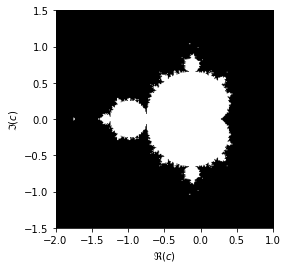

In [43]:
import matplotlib.pyplot as plt
plt.imshow(mandelbrot_set.T, extent=[-2, 1, -1.5, 1.5])
plt.gray()
plt.xlabel("$\Re(c)$")
plt.ylabel("$\Im(c)$")
plt.show()

## Mini-project: Markov Chain

Key Skills:
* Calculating a transition matrix
* Defining a transition matrix in `numpy`
* Matrix-vector multiplication

Wikipedia: A *Markov chain* is a *stochastic model* describing a sequence of possible events in which the *probability of each event* depends only on the state attained in the previous event.

Imagine you are standing in a five room house.

*Drawing of floorplan of house*

The doors between the rooms of the house are locked.

Problem: Every hour the doors of the house are unlocked, and *you must* move to another room in the house. You have no preference over which room you want to be in next, so you move randomly between the rooms. **Which room will you spend the most time in?**

Now imagine you are in room 1. You could move to rooms 2, 4 and 5 (three rooms). You cannot move to room 3.

Denote $m_{ij}$ the *probability* of moving between room $j$ and room $i$.

What are $m_{21}$, $m_{41}$ and $m_{51}$? What are $m_{11}$ and $m_{31}$?

$$m_{21} = m_{41} = m_{51} = 1/3$$
$$m_{11} = m_{31} = 0$$

${m}_{1} = \begin{bmatrix}  m_{11} \\ m_{21} \\ m_{31} \\ m_{41}  \\m_{51} \end{bmatrix} = \begin{bmatrix}  0 \\ 1/3 \\ 0 \\ 1/3  \\ 1/3 \end{bmatrix} $

*Exercise*: Write down $m_1$, $m_2$, $m_3$, $m_4$, $m_5$.

The transition matrix $M$ has entries $m_{ij}$.

*Exercise*: Write the transition matrix $M$ on paper.

*Exercise*: Write the transition matrix $M$ in a `numpy` array.

$$M = \begin{bmatrix} 
0 & 1/3 & 0 & 1/3 & 1/4 \\
1/3 & 0 & 1/3 & 0 & 1/4 \\
0 & 1/3 & 0 & 1/3 & 1/4 \\
1/3 & 0 & 1/3 & 0 & 1/4 \\
1/3 & 1/3 & 1/3 & 1/3 & 0 \\
\end{bmatrix}$$

In [44]:
M = np.array([[0, 1/3, 0, 1/3, 1/4], 
              [1/3, 0, 1/3, 0, 1/4], 
              [0, 1/3, 0, 1/3, 1/4],
              [1/3, 0, 1/3, 0, 1/4],
              [1/3, 1/3, 1/3, 1/3, 0]])
print(M)

[[0.         0.33333333 0.         0.33333333 0.25      ]
 [0.33333333 0.         0.33333333 0.         0.25      ]
 [0.         0.33333333 0.         0.33333333 0.25      ]
 [0.33333333 0.         0.33333333 0.         0.25      ]
 [0.33333333 0.33333333 0.33333333 0.33333333 0.        ]]


Question: Which room will you spend the most time in?

Let's assume we are certain we start in room 1.

$$ p_0 = \begin{bmatrix} 1.0 & 0.0 & 0.0 & 0.0 & 0.0 \end{bmatrix} $$

In [45]:
p_0 = np.array([1.0, 0.0, 0.0, 0.0, 0.0])

Where will we end up next?

$$ p_1 = M p_0$$ 

In [46]:
p_1 = M@p_0
print(p_1)

[0.         0.33333333 0.         0.33333333 0.33333333]


In [47]:
p_2 = M@p_1
print(p_2)

[0.30555556 0.08333333 0.30555556 0.08333333 0.22222222]


In [48]:
p_3 = M@p_2
print(p_3)

[0.11111111 0.25925926 0.11111111 0.25925926 0.25925926]


In [49]:
p = np.array([1.0, 0.0, 0.0, 0.0, 0.0])
for i in range(0, 50):
    p = M@p
print(p)

[0.1875 0.1875 0.1875 0.1875 0.25  ]


*Question*: What happens if we are not sure where we start?

In [50]:
p = np.array([0.25, 0.25, 0.0, 0.25, 0.25])
for i in range(0, 50):
    p = M@p
print(p)

[0.1875 0.1875 0.1875 0.1875 0.25  ]


## Mini-project: Calculating $\pi$ with Monte Carlo

Key skills:
* Simulating random numbers
* Boolean operations
* Slicing with strides
* Counting
* Algorithms with no tight-loops

Imagine you are blind-folded and you have an infinite number of darts to throw at the following square board:

*Draw square with quarter circle*

How can we calculate the value of $\pi$?

*Monte Carlo* (random simulation) provides a powerful answer to this problem.

Steps:
    
1. Randomly throw (many) darts into the square (random simulation).
2. Calculate the ratio $r$ of the number of darts that fall inside the circle/total number thrown.
3. $\pi = 4r$

### Step 1: Simulate from uniform distribution

We want to 'simulate' the idea of throwing darts randomly at a square board.

Computers can *generate* (pseudo-)random numbers.

1. Tool: `np.random.uniform(size=())` to simulate N draws of uniformly distributed random numbers on the board.

Uniformly distributed - equally likely to be at any value between $[0, 1]$.

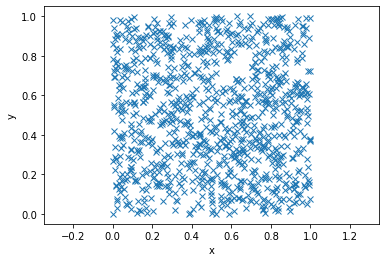

In [51]:
import matplotlib.pyplot as plt
N = 100000
darts = np.random.uniform(size=(N, 2))
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(darts[::100, 0], darts[::100, 1], 'x')

### Step 2: Calculate the squared distance from the point to the origin.

1. Tool: Slicing to get all x and all y coordinates. 
2. Tool: `**2` to square entries of an array.

In [52]:
squared_dist = darts[:, 0]**2 + darts[:, 1]**2

### Step 3: Which darts landed inside the circle?

1. Tool: Boolean selection.

In [53]:
inside_outside = squared_dist < 1.0
print(inside_outside)

[ True  True  True ...  True False  True]


### Step 4: Count the number of `True` values.

1. Tool: Use `np.count_nonzero`.

In [54]:
np.lookfor('count')

Search results for 'count'
--------------------------
numpy.bincount
    Count number of occurrences of each value in array of non-negative ints.
numpy.busday_count
    Counts the number of valid days between `begindates` and
numpy.nanmax
    Return the maximum of an array or maximum along an axis, ignoring any
numpy.nanmin
    Return minimum of an array or minimum along an axis, ignoring any NaNs.
numpy.count_nonzero
    Counts the number of non-zero values in the array ``a``.
numpy.Str0.count
    Return the number of non-overlapping occurrences of substring sub in
numpy.ma.count
    Count the non-masked elements of the array along the given axis.
numpy.fromfile
    Construct an array from data in a text or binary file.
numpy.fromiter
    Create a new 1-dimensional array from an iterable object.
numpy.Bytes0.count
    Return the number of non-overlapping occurrences of subsection sub in
numpy.nancumsum
    Return the cumulative sum of array elements over a given axis treating Not a
nu

2. Found tool: np.count_nonzero

In [55]:
num_inside = np.count_nonzero(inside_outside)
print(num_inside)

78599


### Step 5. Calculate $\pi$!

In [56]:
estimate_pi = 4.0*num_inside/N
print(estimate_pi)
print(np.pi)
print(np.abs(np.pi - estimate_pi))

3.14396
3.141592653589793
0.00236734641020675
